# Problem Description
   The problem of automatically identifying objects in photographs is difficult because of the near infinite number of permutations of objects, positions, lighting and so on. It’s a really hard problem.

In [1]:
# Importing Libraries
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from scipy.misc import toimage

Using TensorFlow backend.


In [2]:
#Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 57s 0us/step


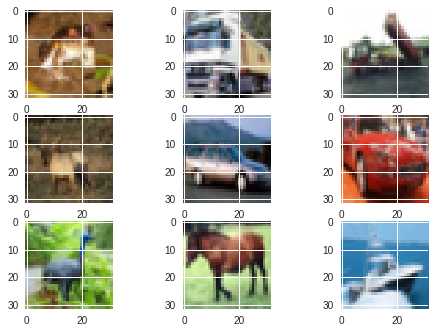

In [3]:
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i])
  
#show the plot
plt.show()

In [0]:
# Simple CNN model for CIFAR-10
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras import regularizers
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import LearningRateScheduler

import numpy as np
K.set_image_dim_ordering('th')

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [0]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 22s 440us/step - loss: 1.7019 - acc: 0.3821 - val_loss: 1.3925 - val_acc: 0.4982
Epoch 2/25
50000/50000 [==============================] - 19s 380us/step - loss: 1.3392 - acc: 0.5157 - val_loss: 1.1944 - val_acc: 0.5758
Epoch 3/25
50000/50000 [==============================] - 19s 380us/step - loss: 1.1655 - acc: 0.5845 - val_loss: 1.0932 - val_acc: 0.6063
Epoch 4/25
50000/50000 [==============================] - 19s 382us/step - loss: 1.0341 - acc: 0.6294 - val_loss: 1.0318 - val_acc: 0.6339
Epoch 5/25
50000/50000 [==============================] - 19s 379us/step - loss: 0.9272 - acc: 0.6700 - val_loss: 0.9631 - val_acc: 0.6637
Epoch 6/25
50000/50000 [==============================] - 19s 379us/step - loss: 0.8417 - acc: 0.7016 - val_loss: 0.9488 - val_acc: 0.6642
Epoch 7/25
50000/50000 [==============================] - 19s 380us/step - loss: 0.7654 - acc: 0.7289 - val_loss: 0.

# To Improve the accuracy using Deep Neural Network Architecture.

# Data Augmentation

In [0]:
#Input image dimensions
img_rows, img_cols = 32, 32

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
datagen.fit(X_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


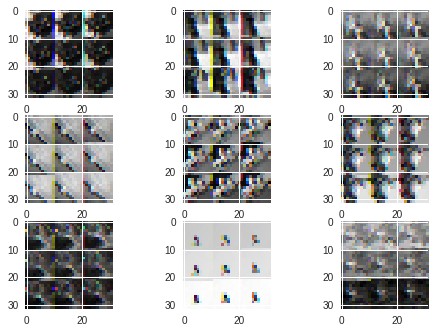

In [22]:
from matplotlib import pyplot as plt
# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(toimage(X_batch[i].reshape(img_rows, img_cols, 3)))
    # show the plot
    plt.show()
    break

In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
#z-score
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [15]:
# Create model
weight_decay = 1e-4

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
__________

In [0]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [0]:
#training
batch_size = 64

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(X_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 
 
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Epoch 1/125
781/781 [==============================] - 46s 59ms/step - loss: 1.7392 - acc: 0.4277 - val_loss: 1.3870 - val_acc: 0.5306
Epoch 2/125
781/781 [==============================] - 42s 54ms/step - loss: 1.1994 - acc: 0.5938 - val_loss: 1.0747 - val_acc: 0.6605
Epoch 3/125
781/781 [==============================] - 41s 52ms/step - loss: 1.0424 - acc: 0.6568 - val_loss: 0.9424 - val_acc: 0.7042
Epoch 4/125
781/781 [==============================] - 40s 51ms/step - loss: 0.9652 - acc: 0.6922 - val_loss: 0.7962 - val_acc: 0.7573
Epoch 5/125
781/781 [==============================] - 40s 51ms/step - loss: 0.9085 - acc: 0.7168 - val_loss: 0.8033 - val_acc: 0.7569
Epoch 6/125
781/781 [==============================] - 42s 53ms/step - loss: 0.8695 - acc: 0.7341 - val_loss: 0.8223 - val_acc: 0.7580
Epoch 7/125
781/781 [==============================] - 41s 53ms/step - loss: 0.8404 - acc: 0.7461 - val_loss: 0.7269 - val_acc: 0.7881
Epoch 8/125
781/781 [==============================] - 